## Análise Preditiva de Derrame

### Contexto
- De acordo com a Sociedade Brasileira de Doenças Cerebrovasculares, o acidente vascular cerebral (AVC) é definido como um déficit neurológico súbito causado por um problema nos vasos sanguíneos do sistema nervoso central. Muitas pessoas usam o termo “derrame” quando o paciente sofre este episódio.    

##### Como se desenvolve o AVC
- “O AVC – acidente vascular cerebral (ou AVE; acidente vascular encefálico) – é conhecido popularmente como ‘derrame’ ou ‘trombose’. Este episódio pode ser classificado em dois tipos: AVC isquêmico, quando a artéria do cérebro se obstrui e ocasiona, consequentemente, uma isquemia (falta de sangue em determinada região); ou AVC hemorrágico, que é quando a artéria cerebral se rompe e causa um sangramento, uma hemorragia dentro do cérebro”, informa o cardiologista Francisco Flávio Costa Filho. 
- Segundo o especialista, o termo “trombose” estaria mais associado, na linguagem popular, ao AVC isquêmico, porque a obstrução da artéria ocorre em função da presença de um trombo. Já o termo “derrame” estaria mais associado ao AVC hemorrágico, porque o sangue “se derrama” dentro do cérebro.
- “No caso do AVC isquêmico, níveis elevados de pressão associados a outros fatores de risco (diabetes, colesterol elevado e tabagismo) levam à inflamação das artérias cerebrais, levando a formação de placas de colesterol ou espessamento da camada interna, até que obstrui completamente o vaso. No AVC Hemorrágico, esse mesmo processo inflamatório deixa a parede do vaso cerebral fragilizada de tal forma que ela, literalmente, se rompe, gerando o hematoma”, explica o cardiologista.

##### Prevenção e tratamento contra hipertensão e derrame
- Como a elevação da pressão está diretamente ligada à ocorrência do AVC, é essencial buscar formas de prevenir e tratar a hipertensão para, assim, diminuir também as chances de “derrame”. Portanto, deve-se apostar em uma alimentação saudável – nutritiva e pouco gordurosa e calórica – prática regular de atividades físicas, especialmente aeróbicas (corrida, ciclismo, natação, caminhada) e evitar fumar e ingerir bebidas alcoólicas em excesso. O tratamento medicamentoso contra hipertensão também é fundamental.

### Base de Dados
- A base de dados foi retirada do site kaggle: 'https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv';
- A fonte da base é confidencial.

##### Atributos:
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
  
  *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Expectativas Iniciais
- TODO

### Importando Bibliotecas

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### Upload da base de dados

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding='latin1')
df = df.drop('id', axis=1)
#display(df)
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


### Tratando valores nulos

In [3]:
# Itera cada coluna no arquivo
for coluna in df:
    # Se a coluna inteira tiver mais de 300 estão vazias...
    if df[coluna].isnull().sum() > 300:
        # Deleta a coluna
        df = df.drop(coluna, axis=1)
# Imprime somatório de campos vazios por coluna        
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [4]:
# Exclui todas as linhas que tiverem valores vazios
df = df.dropna()

# Imprime quantidade de linhas e colunas
print(df.shape)
# Imprime somatório de campos vazios por coluna 
print(df.isnull().sum())

(4909, 11)
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### Análise dos tipos de dados e características das colunas

In [5]:
# Imprime o tipo de dado à cada coluna
print(df.dtypes)
# Imprime 60 -
print('-'*60)
# Imprime primeiro registro(linha) de cada coluna
print(df.iloc[0])

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------
gender                          Male
age                               67
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


### Apresentação inicial da % de cada atributo

In [9]:
#!pip install plotly_express

import plotly_express as pe

cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
for col in cols:
    fig = pe.pie(values=df[col].groupby(df[col]).count(),names=df[col].groupby(df[col]).count().index,title="Distribution of {}".format(col))
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

###### De acordo com os gráficos iniciais:
- Pessoas do sexo feminino sofrem proporcionalmente mais derrame;
- O quadro de hipertensão tem peso de quase 90% para potencial derrame;
- O histórico de doenças cardíacas tem peso de 95% para potencial derrame;
- A situação de histórico de casamento (atual ou já foi casado) tem relevância arredondada de 65% para a análise do caso;
- Quem trabalha em empresa privada tem mais da metade (57%) de chance de sofrer derrame do que o somatório de todos os outros tipos de distribuição de trabalho (próprio, com crianças e público). Desdes, a menor probabilidade está no setor público;
- O dado de tipo de residência - rural ou urbano - não tem muito diferencial, considerando uma distribuição proporcional equivalente: 49,3% para 50,7%;
- Não foi visto uma proporção alarmante entre o fator 'fumante' para a análise do caso;
- De todos os pesquisados, 4,26% já tiveram derrame.

### Tratamento das colunas não numéricas

In [10]:
# Retorna todas as colunas que não são int64 ou float64
df.select_dtypes(exclude=['int64','float64']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [11]:
# Tratando informações

#gender
df = df[(df["gender"] =="Male")|(df["gender"] =="Female")]
df.gender.replace({'Male': 1, 'Female': 0}, inplace=True)
#ever_married 
df.ever_married.replace({'No': 0, 'Yes': 1}, inplace=True)
#work_type
df.work_type.replace({'Private': 0, 'Self-employed': 1, 'children': 2,'Govt_job':3,'Never_worked':4}, inplace=True)
#Residence_type
df.Residence_type.replace({'Urban': 0, 'Rural': 1}, inplace=True)
#smoking_status
df.smoking_status.replace({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3}, inplace=True)

print(df.dtypes)
display(df)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,2,1
2,1,80.0,0,1,1,0,1,105.92,32.5,0,1
3,0,49.0,0,0,1,0,0,171.23,34.4,3,1
4,0,79.0,1,0,1,1,1,174.12,24.0,0,1
5,1,81.0,0,0,1,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,2,1,103.08,18.6,1,0
5106,0,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,0,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,1,51.0,0,0,1,0,1,166.29,25.6,2,0


### Mapeamento da Correlação

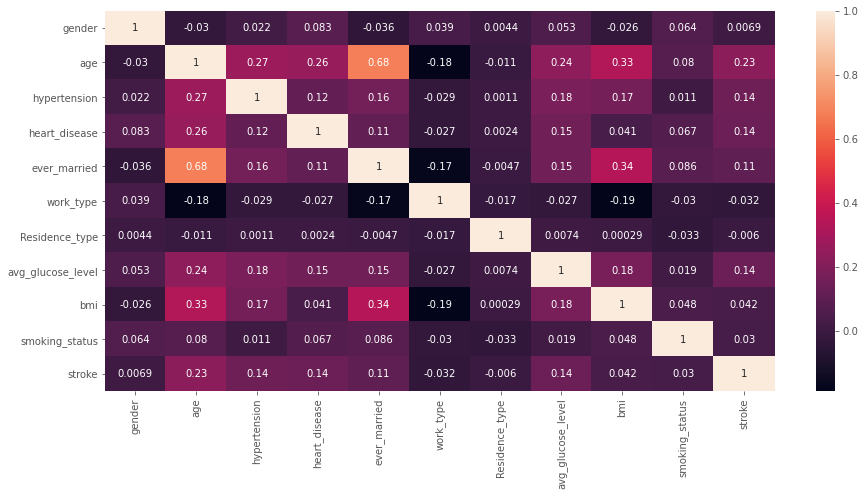

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

- Gênero não tem relação significativa com derrame;
- BMI não tem relação significativa com derrame;
- Tipo de Residência é insignificante com relação à derrame;
- O elemento que mais se aproxima no impacto ao diagnóstico de derrame é a idade;
- Decidimos manter as colunas não significativas em comparação à saída do dado 'stroke' porquê outras relações importantes podem ser feitas entre elas, por exemplo, bmi x ever_married ou bmi x age.